In [1]:
import seaborn as sns; sns.set()
import numpy as np
import cv2
import os
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'binary_svm2/'
img_class = os.listdir(path)

x_train = []
y_train = []

images = []

width = 50
height = 50
dsize = (width, height)

for n ,a in enumerate(img_class):
    p = path + a + '/'
    img_name = os.listdir(p)
    
    for b in img_name:
        p2 = p + b
        img = cv2.imread(p2)
        img2 = cv2.resize(img, dsize)
        gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
        
        flatten = gray.flatten()
        x_train.append(flatten)
        y_train.append(a)
        
        images.append(gray)
    
print(len(x_train))
print(len(y_train))

2147
2147


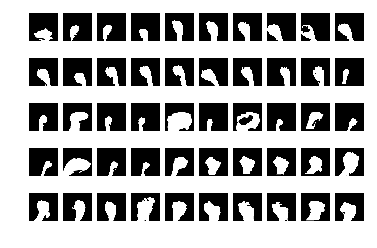

In [21]:
fig, ax = plt.subplots(5, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(images[i], cmap='gray')
    axi.axis('off')

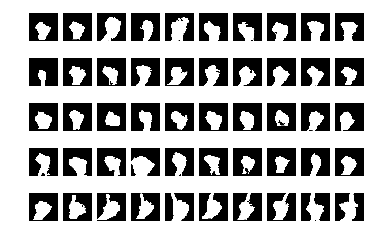

In [6]:
fig, ax = plt.subplots(5, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(images[2*i], cmap='gray')
    axi.axis('off')

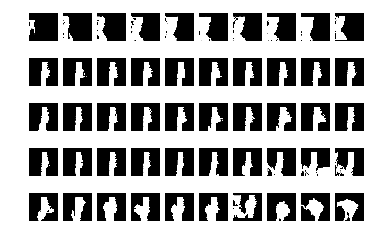

In [5]:
fig, ax = plt.subplots(5, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(images[500+i], cmap='gray')
    axi.axis('off')

In [3]:
# parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid', 'precomputed'), 'C':[1, 2, 4, 8, 10]}
parameters = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 'C':[0.1,1,0.01],'gamma':[1,0.1,0.01]}
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 2, 4, 8, 10]}

svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 'C': [0.1, 1, 0.01], 'gamma': [1, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [4]:
clf.best_score_

0.8383791336748952

In [5]:
clf.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}

In [6]:
model = clf.best_estimator_
model.fit(x_train, y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
filename = 'svm5.sav'
pickle.dump(model, open(filename, 'wb'))

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

cross_val_score(GaussianNB(), x_train, y_train)

array([0.64736842, 0.6984127 , 0.60427807])

In [14]:
path = 'binary/'
img_class = os.listdir(path)

x_test = []
y_test = []

width = 50
height = 50
dsize = (width, height)

for n ,a in enumerate(img_class):
    p = path + a + '/'
    img_name = os.listdir(p)
    
    for b in img_name:
        p2 = p + b
        img = cv2.imread(p2)
        img2 = cv2.resize(img, dsize)
        gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
        
        flatten = gray.flatten()
        x_test.append(flatten)
#         x_train.append(flatten.tolist())
        y_test.append(a)
    
print(len(x_test))

567


In [15]:
m = model.predict(x_test)
m

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2

In [17]:
print('Accuracy')
print(sum(y_train2 == m)/len(y_train2))

Accuracy
1.0


In [19]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_train2,y_train2)
print(result)

1.0
